# Minggu 1 : Menganalisa dan konversi file JSON
Dependency yang digunakan : pandas, json, matplotlib

### Membaca file JSON dan konversi ke CSV serta membersihkan baris Null

In [15]:
import pandas as pd
import json

# Fungsi untuk menghitung jumlah baris dalam file JSON
def count_lines(file_path):
    with open(file_path, 'r') as file:
        return sum(1 for _ in file)

# Fungsi untuk memproses data dalam potongan-potongan dengan penanganan kesalahan
def process_json_chunks(file_path, chunk_size=10000, output_file='cleaned_data.csv'):
    total_lines = count_lines(file_path)
    processed_lines = 0

    with open(file_path, 'r') as file:
        # Initialize output file
        with open(output_file, 'w') as outfile:
            outfile.write('')  # Ensure the output file is empty at the start
        chunk = []
        for line in file:
            try:
                json_obj = json.loads(line)
                chunk.append(json_obj)
            except json.JSONDecodeError as e:
                print(f"Skipping invalid line due to error: {e}")
                continue  # Skip invalid lines
            if len(chunk) >= chunk_size:
                df = pd.json_normalize(chunk)
                df_cleaned = df.dropna()
                df_cleaned.to_csv(output_file, mode='a', header=(processed_lines == 0), index=False)
                processed_lines += len(chunk)
                chunk = []
        # Process remaining data in the chunk
        if chunk:
            df = pd.json_normalize(chunk)
            df_cleaned = df.dropna()
            df_cleaned.to_csv(output_file, mode='a', header=(processed_lines == 0), index=False)
    print(f"Data cleaned and saved to '{output_file}'")

# Jalur file JSON
file_path = 'data.json'

# Memproses data dengan chunks dan penanganan kesalahan
process_json_chunks(file_path)

Data cleaned and saved to 'cleaned_data.csv'


### Cleaning rule untuk kolom level dan gender

In [3]:
import pandas as pd

# Baca file CSV
df = pd.read_csv('cleaned_data.csv')
# Filter data berdasarkan kriteria yang diberikan
df_cleaned = df[(df['level'].isin(['paid', 'free'])) & (df['gender'].isin(['F', 'M']))]
# Simpan data yang telah dibersihkan ke file baru atau menimpa file lama
df_cleaned.to_csv('cleaned_filtered.csv', index=False)

print("Data telah dibersihkan dan disimpan ke 'cleaned_filtered.csv'.")

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14796\4173198407.py:4: DtypeWarning: Columns (2,8,11,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('cleaned_data.csv')


Data telah dibersihkan dan disimpan ke 'cleaned_filtered.csv'.


### Menggabungkan kolom firstname dan lastname pada kolom name dan membuang kolom tertentu

In [7]:
import pandas as pd

# Baca file CSV
df = pd.read_csv('cleaned_filtered.csv')
# Gabungkan kolom firstName dan lastName menjadi kolom baru name
df['name'] = df['firstName'] + ' ' + df['lastName']
# Hapus kolom firstName dan lastName
df = df.drop(columns=['firstName', 'lastName'])
# Hapus kolom status, auth, page, dan method
df = df.drop(columns=['status', 'auth', 'page', 'method'])
# Tentukan urutan kolom yang diinginkan
desired_order = [
    'gender', 'length', 'name', 'level', 'registration', 
    'userId', 'ts', 'sessionId', 'location', 'itemInSession', 
    'userAgent', 'song', 'artist'
]
# Atur urutan kolom DataFrame sesuai dengan yang diinginkan
df = df[desired_order]
# Simpan DataFrame ke file CSV baru
df.to_csv('fullname.csv', index=False)

print("File CSV baru dengan kolom 'name' berhasil disimpan sebagai 'modified_data.csv'")

File CSV baru dengan kolom 'name' berhasil disimpan sebagai 'modified_data.csv'


### Meengubah useragent menjadi Device

In [10]:
import pandas as pd

# Baca file CSV
df = pd.read_csv('fullname.csv')

# Fungsi untuk mengekstrak informasi perangkat dari userAgent
def extract_device(userAgent):
    if 'Mobile' in userAgent:
        return 'Mobile'
    elif 'Tablet' in userAgent:
        return 'Tablet'
    elif 'Windows' in userAgent:
        return 'Windows PC'
    elif 'Macintosh' in userAgent:
        return 'Mac'
    elif 'Linux' in userAgent:
        return 'Linux PC'
    else:
        return 'Other'

# Terapkan fungsi untuk menambahkan kolom device
df['device'] = df['userAgent'].apply(extract_device)

# Drop kolom userAgent
df = df.drop(columns=['userAgent'])

# Simpan DataFrame yang telah dimodifikasi ke file CSV baru
df.to_csv('device.csv', index=False)

print("File CSV dengan kolom 'device' berhasil disimpan sebagai 'modified_data_with_device.csv'")

File CSV dengan kolom 'device' berhasil disimpan sebagai 'modified_data_with_device.csv'


# Visualisasi Data dengan Matplotlib

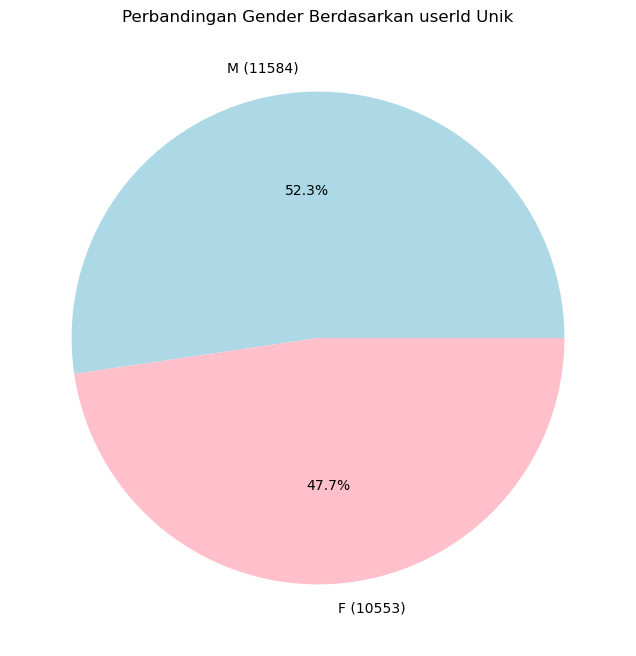

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Baca file CSV
df = pd.read_csv('device.csv')

# Hapus baris duplikat berdasarkan 'userId' untuk mendapatkan userId yang unik
df_unique = df.drop_duplicates(subset='userId')

# Hitung jumlah laki-laki dan perempuan berdasarkan userId unik
gender_counts = df_unique['gender'].value_counts()

# Format label untuk menampilkan jumlah gender dan persentase
labels = [f'{gender} ({count})' for gender, count in zip(gender_counts.index, gender_counts)]

# Plot Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=labels, autopct='%1.1f%%', colors=['lightblue', 'pink'])
plt.title('Perbandingan Gender Berdasarkan userId Unik')
plt.show()


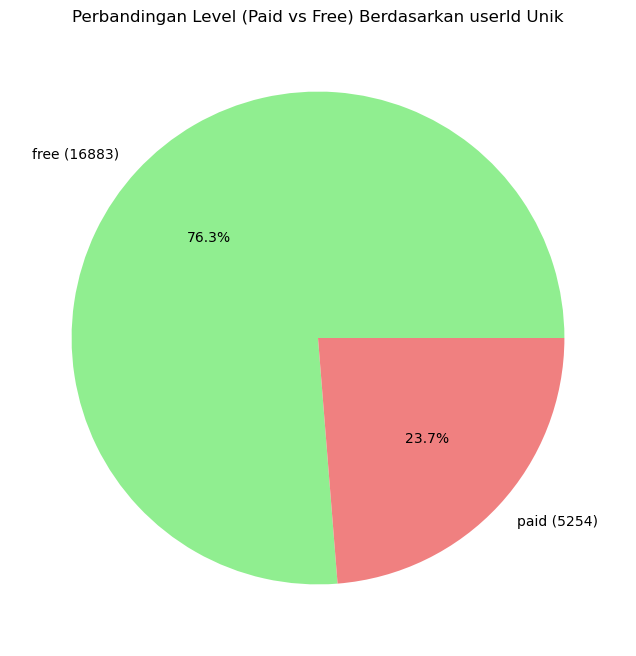

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Baca file CSV
df = pd.read_csv('device.csv')

# Hapus baris duplikat berdasarkan 'userId' untuk mendapatkan userId yang unik
df_unique = df.drop_duplicates(subset='userId')

# Hitung jumlah pengguna unik berdasarkan level
level_counts = df_unique['level'].value_counts()

# Format label untuk menampilkan jumlah level dan persentase
labels = [f'{level} ({count})' for level, count in zip(level_counts.index, level_counts)]

# Plot Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(level_counts, labels=labels, autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'])
plt.title('Perbandingan Level (Paid vs Free) Berdasarkan userId Unik')
plt.show()


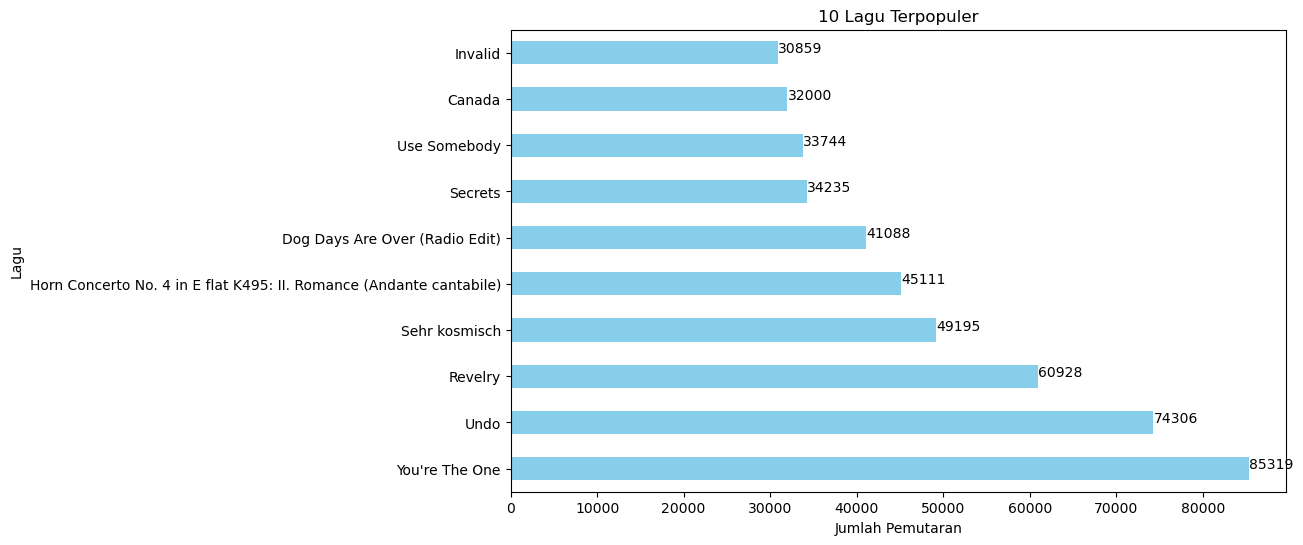

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 131 (\x83) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


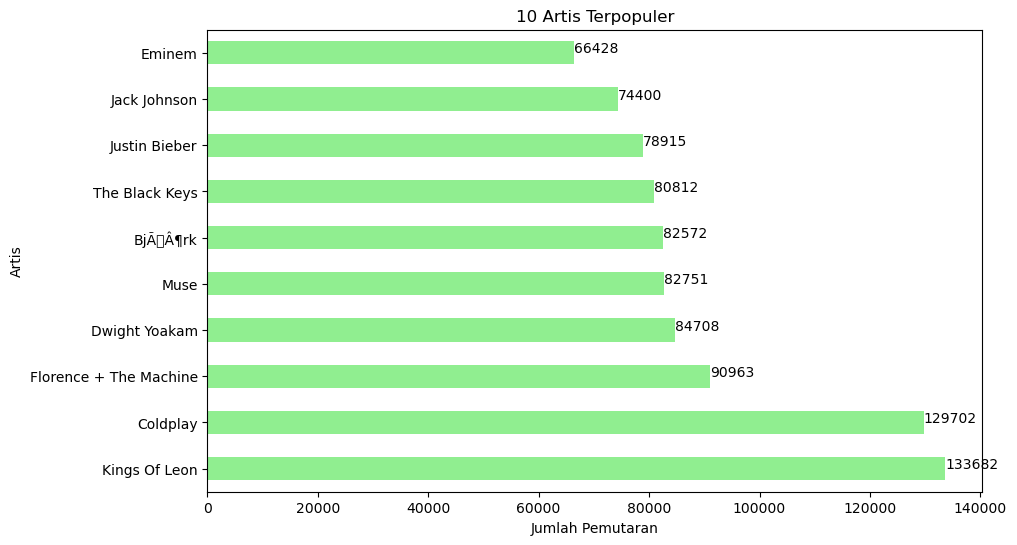

In [24]:
import matplotlib.pyplot as plt

# Baca file CSV
df = pd.read_csv('device.csv')

# Hitung jumlah pemutaran lagu dan artis
top_songs = df['song'].value_counts().head(10)
top_artists = df['artist'].value_counts().head(10)

# Buat bar chart untuk lagu
plt.figure(figsize=(10, 6))
bars = top_songs.plot(kind='barh', color='skyblue')
plt.title('10 Lagu Terpopuler')
plt.xlabel('Jumlah Pemutaran')
plt.ylabel('Lagu')

# Tambahkan label pada setiap bar
for index, value in enumerate(top_songs):
    plt.text(value, index, str(value))

plt.show()

# Buat bar chart untuk artis
plt.figure(figsize=(10, 6))
bars = top_artists.plot(kind='barh', color='lightgreen')
plt.title('10 Artis Terpopuler')
plt.xlabel('Jumlah Pemutaran')
plt.ylabel('Artis')

# Tambahkan label pada setiap bar
for index, value in enumerate(top_artists):
    plt.text(value, index, str(value))

plt.show()

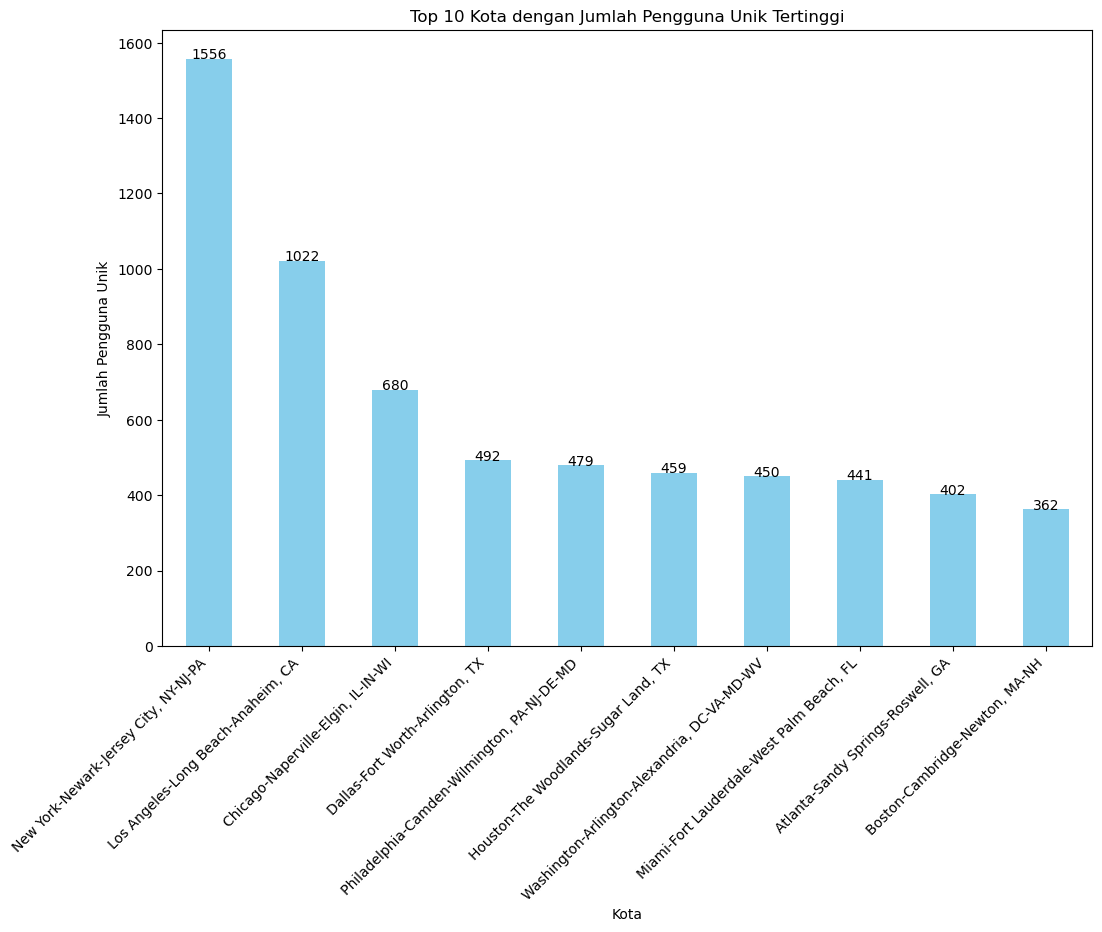

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Baca file CSV
df = pd.read_csv('cleaned_filtered.csv')

# Hapus baris duplikat berdasarkan 'userId' untuk mendapatkan userId yang unik
df_unique = df.drop_duplicates(subset='userId')

# Hitung jumlah user unik berdasarkan kota
city_counts = df_unique['location'].value_counts()

# Ambil 10 kota dengan jumlah user tertinggi
top_cities = city_counts.head(10)

# Plot Bar Chart untuk 10 kota teratas
plt.figure(figsize=(12, 8))
bars = top_cities.plot(kind='bar', color='skyblue')
plt.title('Top 10 Kota dengan Jumlah Pengguna Unik Tertinggi')
plt.xlabel('Kota')
plt.ylabel('Jumlah Pengguna Unik')
plt.xticks(rotation=45, ha='right')

# Tambahkan label jumlah pada setiap batang
for bar in bars.patches:
    bars.annotate(f'{bar.get_height()}', 
                  (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                  ha='center', va='center', 
                  xytext=(0, 3), 
                  textcoords='offset points')

plt.show()


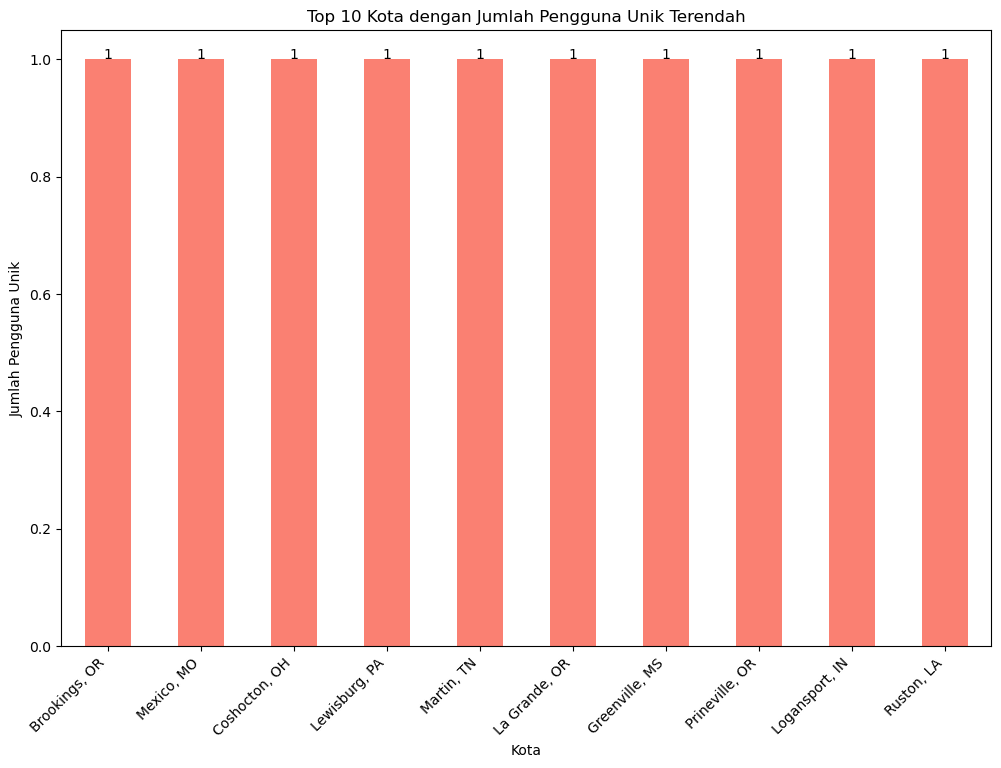

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Baca file CSV
df = pd.read_csv('cleaned_filtered.csv')

# Hapus baris duplikat berdasarkan 'userId' untuk mendapatkan userId yang unik
df_unique = df.drop_duplicates(subset='userId')

# Hitung jumlah user unik berdasarkan kota
city_counts = df_unique['location'].value_counts()

# Ambil 10 kota dengan jumlah user terendah
bottom_cities = city_counts.tail(10)

# Plot Bar Chart untuk 10 kota terbawah
plt.figure(figsize=(12, 8))
bars = bottom_cities.plot(kind='bar', color='salmon')
plt.title('Top 10 Kota dengan Jumlah Pengguna Unik Terendah')
plt.xlabel('Kota')
plt.ylabel('Jumlah Pengguna Unik')
plt.xticks(rotation=45, ha='right')

# Tambahkan label jumlah pada setiap batang
for bar in bars.patches:
    bars.annotate(f'{bar.get_height()}', 
                  (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                  ha='center', va='center', 
                  xytext=(0, 3), 
                  textcoords='offset points')

plt.show()


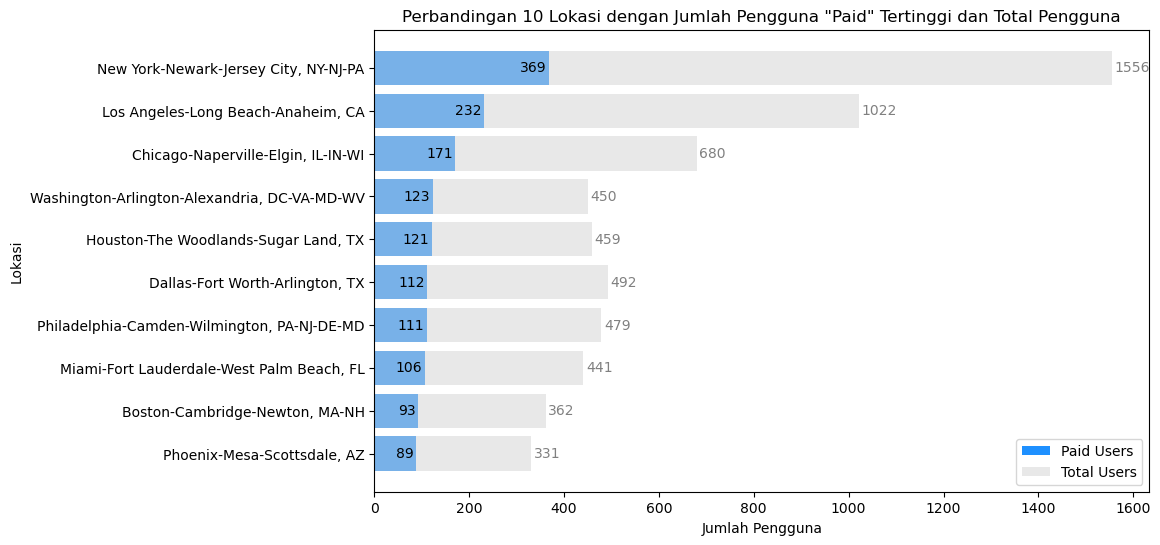

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Baca file CSV
df = pd.read_csv('device.csv')

# Hapus baris duplikat berdasarkan 'userId' untuk mendapatkan userId yang unik
df_unique = df.drop_duplicates(subset='userId')

# Filter data untuk hanya menyertakan pengguna dengan level "paid"
paid_users = df_unique[df_unique['level'] == 'paid']

# Hitung jumlah pengguna "paid" per lokasi
paid_users_count = paid_users['location'].value_counts().reset_index()
paid_users_count.columns = ['location', 'paid_user_count']

# Hitung jumlah total pengguna per lokasi
total_users_count = df_unique['location'].value_counts().reset_index()
total_users_count.columns = ['location', 'total_user_count']

# Gabungkan jumlah pengguna "paid" dan total pengguna per lokasi
location_user_counts = pd.merge(paid_users_count, total_users_count, on='location')

# Ambil 10 lokasi dengan jumlah pengguna "paid" tertinggi
highest_paid_locations = location_user_counts.nlargest(10, 'paid_user_count')

# Plot bar chart untuk 10 lokasi dengan jumlah pengguna "paid" tertinggi
plt.figure(figsize=(10, 6))
bars_paid = plt.barh(highest_paid_locations['location'], highest_paid_locations['paid_user_count'], color='dodgerblue', label='Paid Users')
bars_total = plt.barh(highest_paid_locations['location'], highest_paid_locations['total_user_count'], color='lightgrey', alpha=0.5, label='Total Users')

plt.xlabel('Jumlah Pengguna')
plt.ylabel('Lokasi')
plt.title('Perbandingan 10 Lokasi dengan Jumlah Pengguna "Paid" Tertinggi dan Total Pengguna')
plt.gca().invert_yaxis()  # Membalikkan sumbu y agar lokasi dengan jumlah tertinggi berada di atas

# Tambahkan label jumlah pengguna pada setiap bar (paid dan total)
for bar in bars_paid:
    plt.text(bar.get_width() - 5, bar.get_y() + bar.get_height()/2, f'{int(bar.get_width())}', 
             va='center', ha='right', color='black')

for bar in bars_total:
    plt.text(bar.get_width() + 5, bar.get_y() + bar.get_height()/2, f'{int(bar.get_width())}', 
             va='center', ha='left', color='grey')

plt.legend()
plt.show()


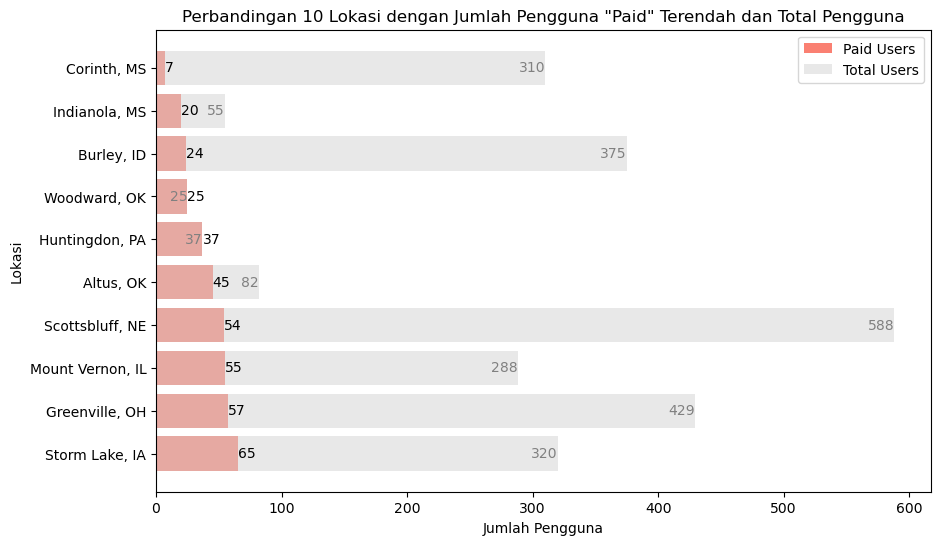

In [45]:
import pandas as pd
import matplotlib.pyplot as plt


# Baca file CSV
df = pd.read_csv('device.csv')

# Hapus baris duplikat berdasarkan 'userId' untuk mendapatkan userId yang unik
df_unique = df.drop_duplicates(subset='userId')

# Filter data untuk hanya menyertakan pengguna dengan level "paid"
paid_users = df[df['level'] == 'paid']

# Hitung jumlah pengguna "paid" per lokasi
paid_users_count = paid_users['location'].value_counts().reset_index()
paid_users_count.columns = ['location', 'paid_user_count']

# Hitung jumlah total pengguna per lokasi
total_users_count = df['location'].value_counts().reset_index()
total_users_count.columns = ['location', 'total_user_count']

# Gabungkan jumlah pengguna "paid" dan total pengguna per lokasi
location_user_counts = pd.merge(paid_users_count, total_users_count, on='location')

# Ambil 10 lokasi dengan jumlah pengguna "paid" terendah
lowest_paid_locations = location_user_counts.nsmallest(10, 'paid_user_count')

# Plot bar chart untuk 10 lokasi dengan jumlah pengguna "paid" terendah
plt.figure(figsize=(10, 6))
bars_paid = plt.barh(lowest_paid_locations['location'], lowest_paid_locations['paid_user_count'], color='salmon', label='Paid Users')
bars_total = plt.barh(lowest_paid_locations['location'], lowest_paid_locations['total_user_count'], color='lightgrey', alpha=0.5, label='Total Users')

plt.xlabel('Jumlah Pengguna')
plt.ylabel('Lokasi')
plt.title('Perbandingan 10 Lokasi dengan Jumlah Pengguna "Paid" Terendah dan Total Pengguna')
plt.gca().invert_yaxis()  # Membalikkan sumbu y agar lokasi dengan jumlah terendah berada di atas

# Tambahkan label jumlah pengguna pada setiap bar (paid dan total)
for bar in bars_paid:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{int(bar.get_width())}', 
             va='center', ha='left', color='black')

for bar in bars_total:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{int(bar.get_width())}', 
             va='center', ha='right', color='grey')

plt.legend()
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


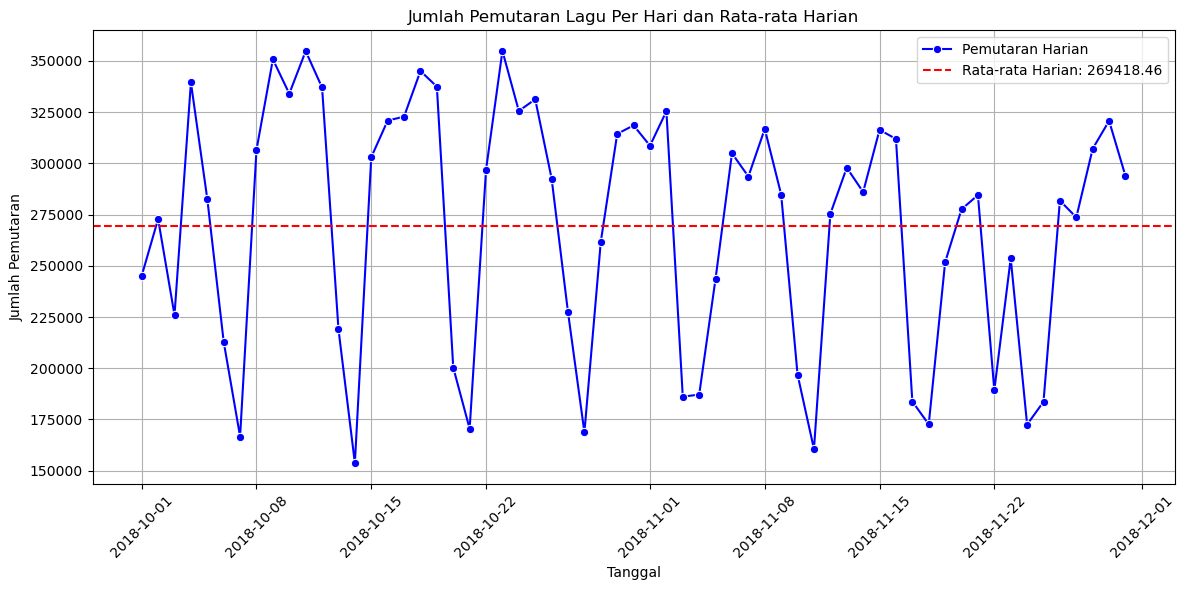

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Baca file CSV
df = pd.read_csv('device.csv')

# Konversi kolom 'ts' menjadi tipe datetime
df['timestamp'] = pd.to_datetime(df['ts'], unit='ms')

# Kelompokkan data berdasarkan hari
df['date'] = df['timestamp'].dt.date

# Hitung jumlah pemutaran lagu per hari
daily_counts = df.groupby('date').size().reset_index(name='count')

# Hitung rata-rata pemutaran musik per hari
average_daily_playback = daily_counts['count'].mean()

# Plot time series dengan rata-rata
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_counts, x='date', y='count', marker='o', color='blue', label='Pemutaran Harian')
plt.axhline(average_daily_playback, color='red', linestyle='--', label=f'Rata-rata Harian: {average_daily_playback:.2f}')
plt.title('Jumlah Pemutaran Lagu Per Hari dan Rata-rata Harian')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Pemutaran')
plt.xticks(rotation=45)  # Rotasi label tanggal agar mudah dibaca
plt.legend()
plt.grid(True)
plt.tight_layout()  # Agar layout lebih rapi
plt.show()

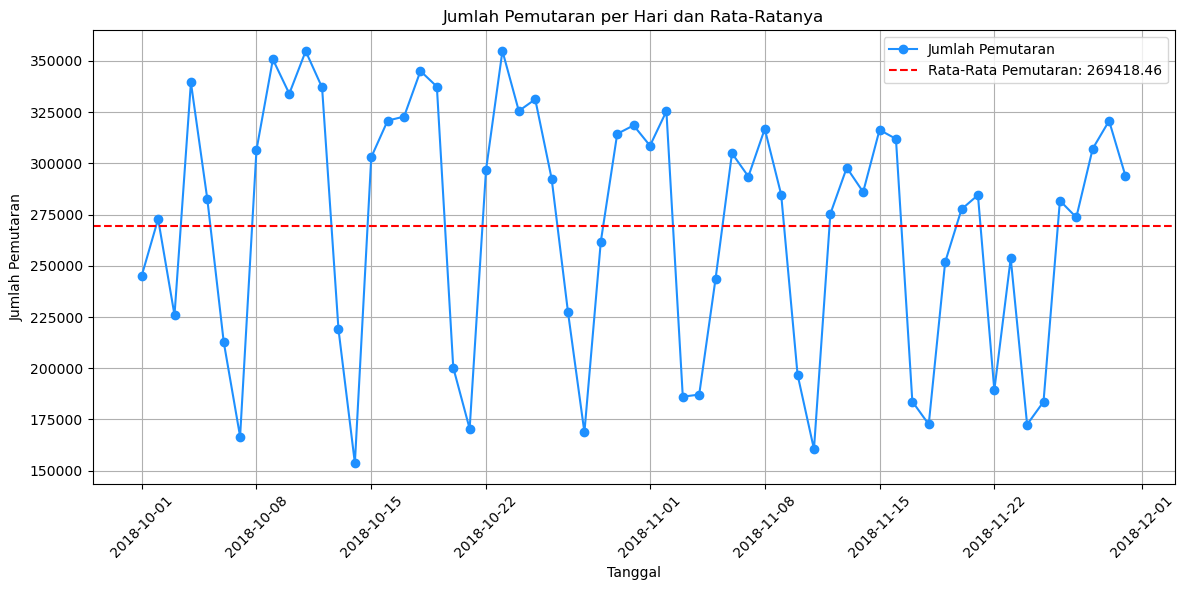

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# Baca file CSV
df = pd.read_csv('device.csv')

# Konversi timestamp (milidetik) ke datetime
df['date'] = pd.to_datetime(df['ts'], unit='ms').dt.date

# Hitung jumlah pemutaran per hari
daily_counts = df['date'].value_counts().sort_index()

# Hitung rata-rata pemutaran per hari
daily_avg = daily_counts.mean()

# Plot jumlah pemutaran per hari
plt.figure(figsize=(12, 6))
plt.plot(daily_counts.index, daily_counts.values, marker='o', linestyle='-', color='dodgerblue', label='Jumlah Pemutaran')
plt.axhline(y=daily_avg, color='red', linestyle='--', label=f'Rata-Rata Pemutaran: {daily_avg:.2f}')

plt.xlabel('Tanggal')
plt.ylabel('Jumlah Pemutaran')
plt.title('Jumlah Pemutaran per Hari dan Rata-Ratanya')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


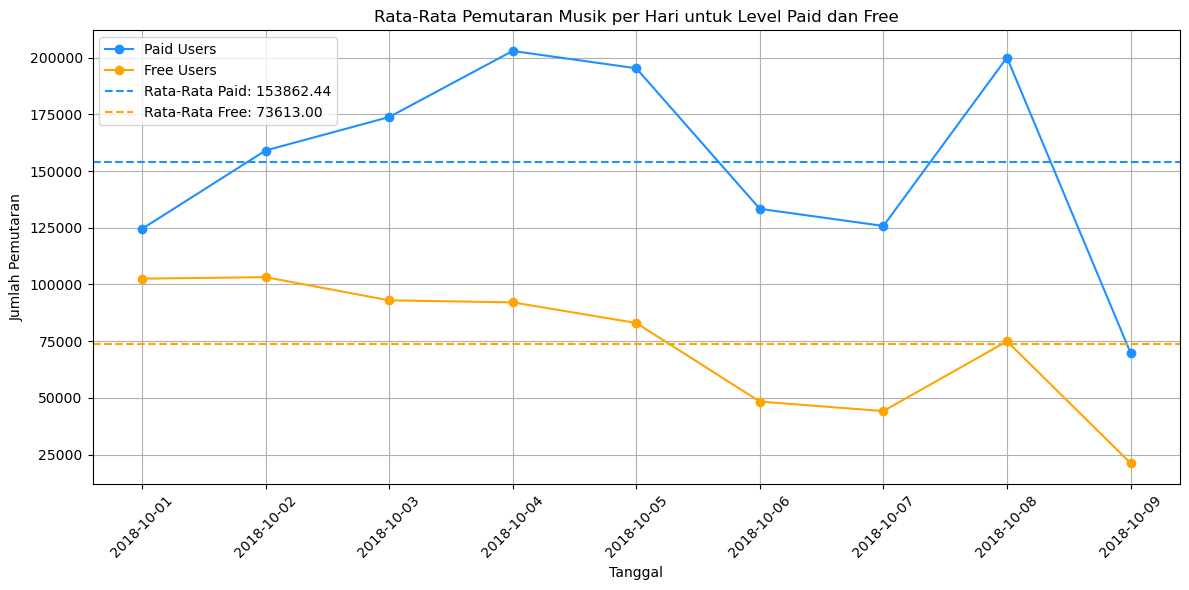

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

# Baca file CSV
df = pd.read_csv('modified_data_with_device.csv')

# Konversi timestamp (milidetik) ke datetime
df['date'] = pd.to_datetime(df['ts'], unit='ms').dt.date

# Pisahkan data berdasarkan level
paid_users = df[df['level'] == 'paid']
free_users = df[df['level'] == 'free']

# Hitung jumlah pemutaran per hari untuk level "paid"
paid_daily_counts = paid_users['date'].value_counts().sort_index()

# Hitung jumlah pemutaran per hari untuk level "free"
free_daily_counts = free_users['date'].value_counts().sort_index()

# Hitung rata-rata pemutaran per hari untuk level "paid"
paid_avg_per_day = paid_daily_counts.mean()

# Hitung rata-rata pemutaran per hari untuk level "free"
free_avg_per_day = free_daily_counts.mean()

# Plot rata-rata pemutaran per hari untuk level "paid" dan "free"
plt.figure(figsize=(12, 6))

plt.plot(paid_daily_counts.index, paid_daily_counts.values, marker='o', linestyle='-', color='dodgerblue', label='Paid Users')
plt.plot(free_daily_counts.index, free_daily_counts.values, marker='o', linestyle='-', color='orange', label='Free Users')

plt.axhline(y=paid_avg_per_day, color='dodgerblue', linestyle='--', label=f'Rata-Rata Paid: {paid_avg_per_day:.2f}')
plt.axhline(y=free_avg_per_day, color='orange', linestyle='--', label=f'Rata-Rata Free: {free_avg_per_day:.2f}')

plt.xlabel('Tanggal')
plt.ylabel('Jumlah Pemutaran')
plt.title('Rata-Rata Pemutaran Musik per Hari untuk Level Paid dan Free')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


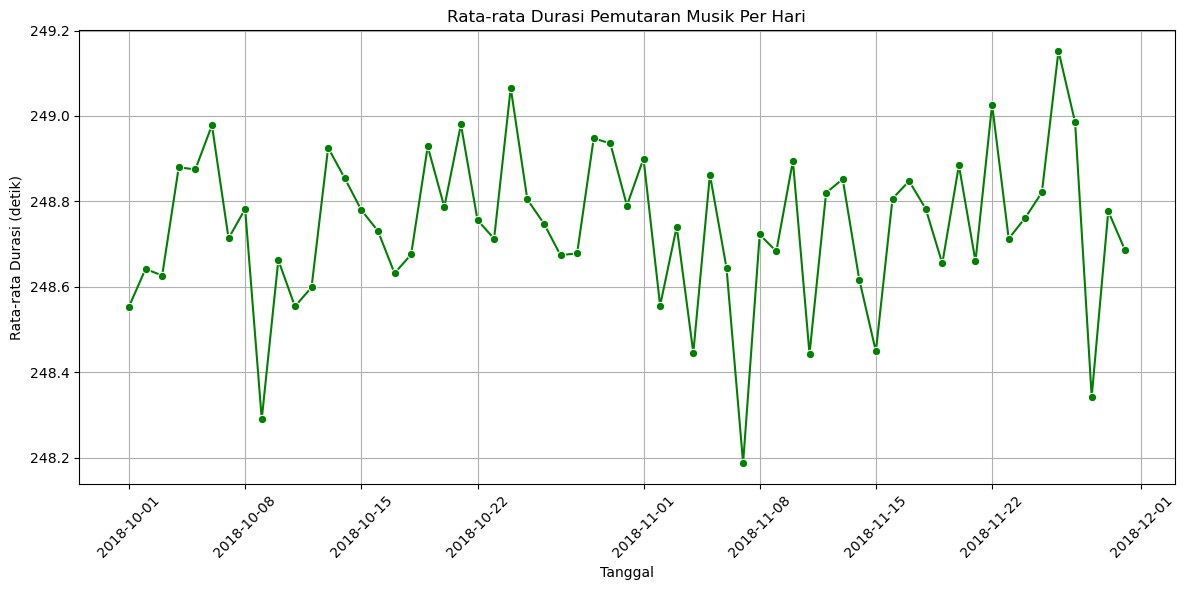

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Baca file CSV
df = pd.read_csv('device.csv')

# Konversi kolom 'ts' menjadi tipe datetime
df['timestamp'] = pd.to_datetime(df['ts'], unit='ms')

# Kelompokkan data berdasarkan tanggal
df['date'] = df['timestamp'].dt.date

# Hitung rata-rata durasi pemutaran musik setiap hari
daily_avg_length = df.groupby('date')['length'].mean().reset_index()

# Plot time series untuk rata-rata durasi pemutaran musik setiap hari
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_avg_length, x='date', y='length', marker='o', color='green')
plt.title('Rata-rata Durasi Pemutaran Musik Per Hari')
plt.xlabel('Tanggal')
plt.ylabel('Rata-rata Durasi (detik)')
plt.xticks(rotation=45)  # Rotasi label tanggal agar mudah dibaca
plt.grid(True)
plt.tight_layout()  # Agar layout lebih rapi
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


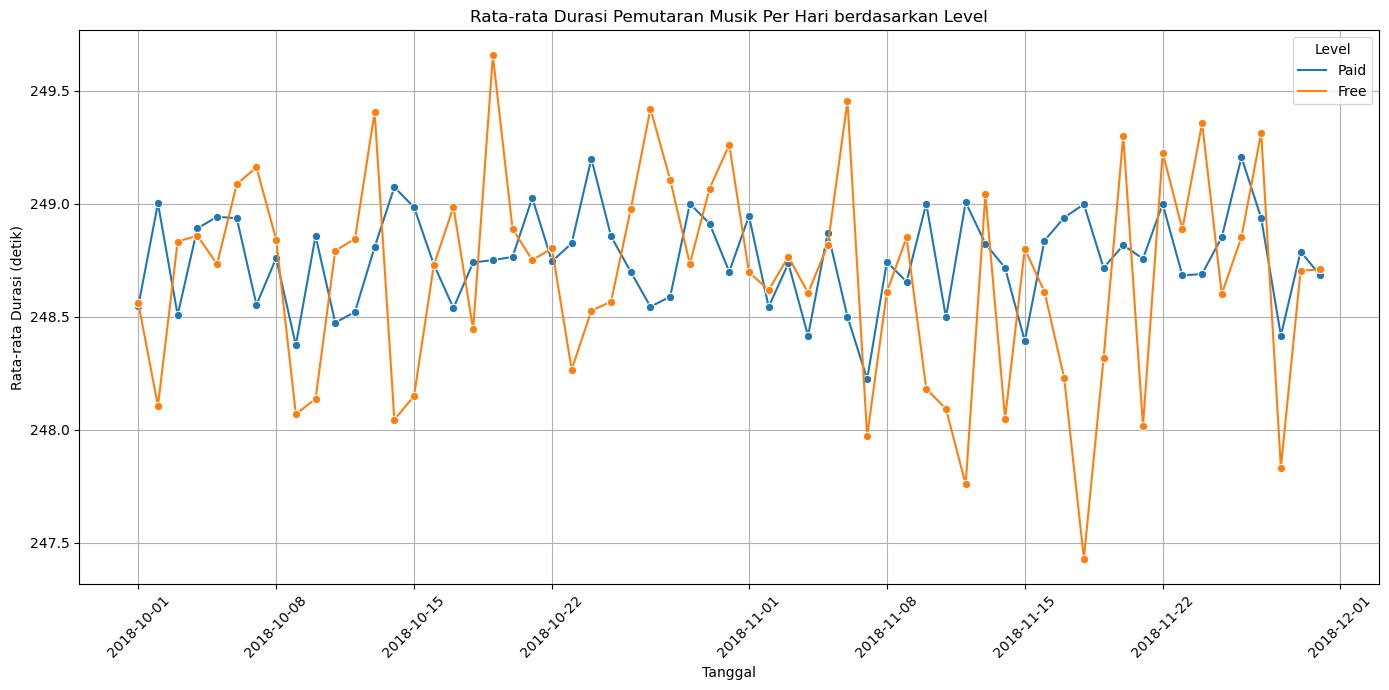

Rata-rata durasi pemutaran musik per hari untuk level Paid: 248.76 detik
Rata-rata durasi pemutaran musik per hari untuk level Free: 248.68 detik


In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Baca file CSV
df = pd.read_csv('device.csv')

# Konversi kolom 'ts' menjadi tipe datetime
df['timestamp'] = pd.to_datetime(df['ts'], unit='ms')

# Kelompokkan data berdasarkan tanggal
df['date'] = df['timestamp'].dt.date

# Pisahkan data berdasarkan level
paid_users = df[df['level'] == 'paid']
free_users = df[df['level'] == 'free']

# Hitung rata-rata durasi pemutaran musik per hari untuk level "paid"
daily_avg_length_paid = paid_users.groupby('date')['length'].mean().reset_index()
daily_avg_length_paid['level'] = 'Paid'

# Hitung rata-rata durasi pemutaran musik per hari untuk level "free"
daily_avg_length_free = free_users.groupby('date')['length'].mean().reset_index()
daily_avg_length_free['level'] = 'Free'

# Gabungkan data rata-rata durasi untuk kedua level
daily_avg_length = pd.concat([daily_avg_length_paid, daily_avg_length_free])

# Plot time series untuk rata-rata durasi pemutaran musik setiap hari
plt.figure(figsize=(14, 7))
sns.lineplot(data=daily_avg_length, x='date', y='length', hue='level', marker='o')
plt.title('Rata-rata Durasi Pemutaran Musik Per Hari berdasarkan Level')
plt.xlabel('Tanggal')
plt.ylabel('Rata-rata Durasi (detik)')
plt.xticks(rotation=45)  # Rotasi label tanggal agar mudah dibaca
plt.grid(True)
plt.tight_layout()  # Agar layout lebih rapi
plt.legend(title='Level')
plt.show()

# Hitung rata-rata durasi pemutaran musik per hari untuk masing-masing level
avg_length_paid = daily_avg_length_paid['length'].mean()
avg_length_free = daily_avg_length_free['length'].mean()

print(f'Rata-rata durasi pemutaran musik per hari untuk level Paid: {avg_length_paid:.2f} detik')
print(f'Rata-rata durasi pemutaran musik per hari untuk level Free: {avg_length_free:.2f} detik')


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


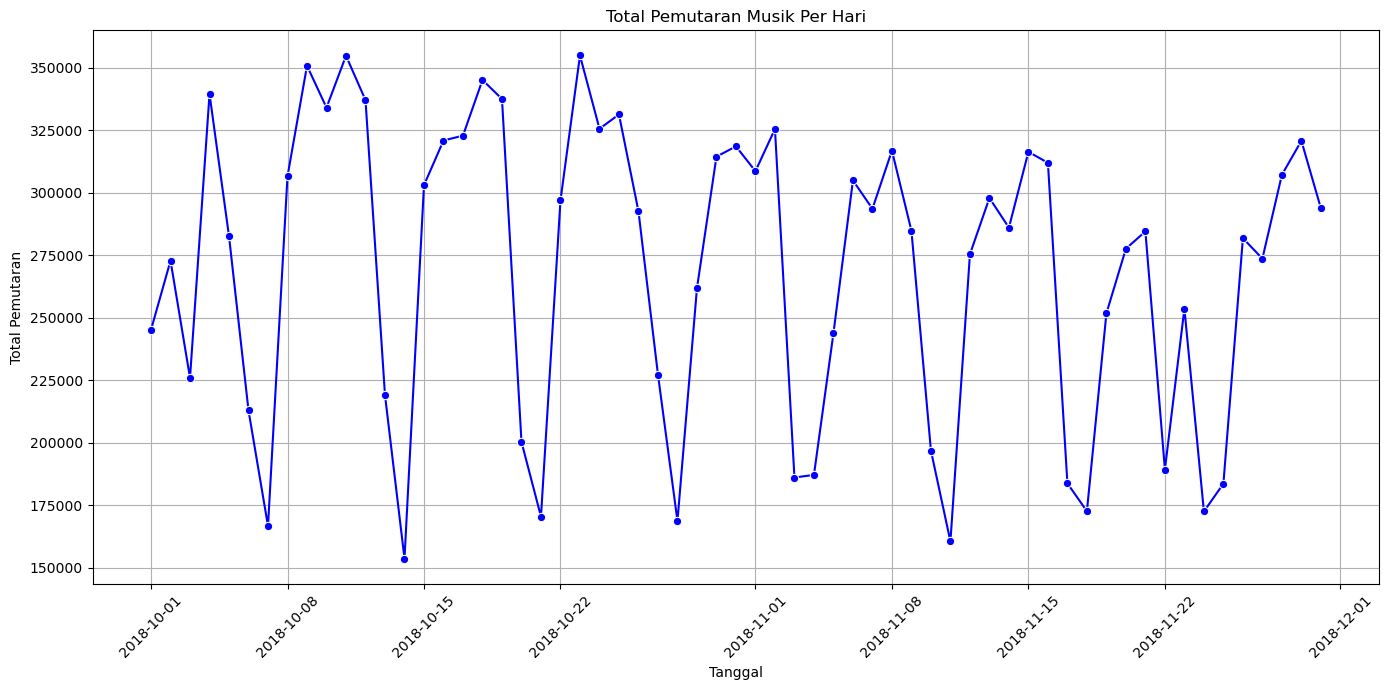

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Baca file CSV
df = pd.read_csv('device.csv')

# Konversi kolom 'ts' menjadi tipe datetime
df['timestamp'] = pd.to_datetime(df['ts'], unit='ms')

# Kelompokkan data berdasarkan tanggal
df['date'] = df['timestamp'].dt.date

# Hitung total pemutaran per hari
daily_playbacks = df.groupby('date').size().reset_index(name='total_playbacks')

# Plot total pemutaran per hari
plt.figure(figsize=(14, 7))
sns.lineplot(data=daily_playbacks, x='date', y='total_playbacks', marker='o', color='blue')
plt.title('Total Pemutaran Musik Per Hari')
plt.xlabel('Tanggal')
plt.ylabel('Total Pemutaran')
plt.xticks(rotation=45)  # Rotasi label tanggal agar mudah dibaca
plt.grid(True)
plt.tight_layout()  # Agar layout lebih rapi
plt.show()
